### 常用激活函数


#### 激活函数的性质

- 非线性
    1. 当激活函数是线性的时候，一个层的神经网络就可以逼近基本上所有的函数了。但是，如果激活函数是恒定激活函数的时候（即 f(x)=x），就不满足这个性质了，而且如果MLP使用的是恒等激活函数，那么其实整个网络跟单层神经网络是等价的，当激活函数是非线性的时候，让模型表现能力更强。
- 线性关系：
    1. 两个变量之间存在一次方函数关系，就称他们之间存在线性关系。
    2. 正比例是线性关系中的特例，反比例关系不是线性关系。更
    3. 通俗一点讲，如果把这两个变量分别作为点的横坐标与纵坐标，其图像是平面上的一条直线，则这两个变量之间的关系就是线性关系。
    4. 即如果可以用一个二元一次方程来表达两个变量之间的关系的话，这两个变量之间的关系称为线性关系，因而，二元一次方程也称为线性方程。
    5. 推而广之，含有n个变量的一次方程，也称为n元线性方程，不过这已经与直线没有什么关系了。
- 可微性
    1. 当优化方法是基于梯度的时候，这个性质是必须的。
- 单调性
    1. 当激活函数是单调的时候，单层网络能够保证是凸函数

- f(x) ≈ x
    1. 当激活函数满足这个性质的时候，如果参数的初始化是 random的很小的值，那么神经网络的训练将会很高效；如果不满足这个性质，那么就需要很
用心的去设置初始值
- 输出值的范围
    1. 当激活函数的输出值是有限的时候，基于梯度的优化方法会更加稳定，因为特征的表示受有限权值的影响更显著；当激活函数的输出是无限的时候模型的训练会更加高效, 不过在这种情况下, 一般需要更小的 learning rate。
- 基于上面性质，也正是我们使用激活函数的原因。

#### Sigmoid 函数


- 优点：

    1. 这应该是神经网络中使用最频繁的激励函数了，它把一个实数（输入的连续实值）压缩到0到1之间，当输入的数字非常大的时候，结果会接近1，
    2. 当输入非常大的负数时，则会得到接近0的结果。在早期的神经网络中使用地非常多，因为它很好地解释了神经元受到刺激后是否被激活和向后传递的场景（0：几乎没有被激活；1：完全被激活）。

- 缺点：

    1. 不过近几年在深度学习的应用中比较少见到它的身影.因为使用Sigmoid函数容易出现梯度弥散或者梯度饱和。当神经网络的层数很多时，如果每一层的激活函数都采用Sigmoid函数的话，就会产生梯度弥散和梯度爆炸的问题，其中梯度爆炸发生的概率非常小，而梯度消失发生的概率比较大。

    2. 下面也画出了Sigmoid函数的导数图，我们可以看到，如果我们初始化神经网络的权重为[0, 1] 之间的随机数值，由反向传播算法的数学推导可知，梯度从后向前传播时，每传递一层梯度值都会减少为原来的 0.25 倍，因为利用反向传播更新参数时，会乘以它的导数，所以会一直减少。
    3. 如果输入的是比较大或比较小的数（例如输入100，经Sigmoid 函数后结果接近于1，梯度接近于0）, 会产生梯度消失现象（饱和效应）, 导致神经元类似于死亡状态。而当网络权值初始化为（1 , 正无穷） 区间的值，则会出现梯度爆炸情况。
    4. 还有Sigmoid函数的output不是0均值（zero-centered），这是不可取的，因为这会导致后一层的神经元将得到上一层输出的非 0 均值的信号作为输入。产生一个结果就是：如 x > 0 ， 则 f = wTx + b，那么对 w 求局部梯度则都为正，这样在反向传播的过程中 w 要么都往正方向更新，要么都往负方形更新，导致一种捆绑的效果，使得收敛缓慢。当然了，如果按照 batch 去训练，那么那个 batch 可能得到不同的信号，所以这个问题还是可以缓解一下的。因此，非0均值这个问题虽然会产生一些不好的影响，不过跟上面提到的梯度消失问题相比还是好很多的。
    5. 最后就是对其解析式中含有幂函数，计算机求解时相对比较耗时，对于规模比较大的深度网络，这会较大的增加训练时间

- Sigmoid函数时使用范围最广的一类非线性激活函数，具有指数函数的形状。
- 它在物理意义上最为接近生物神经元。其自身的缺陷，最明显的就是饱和性。
- 从函数图可以看到，其两侧导数逐渐趋近于0，杀死梯度。

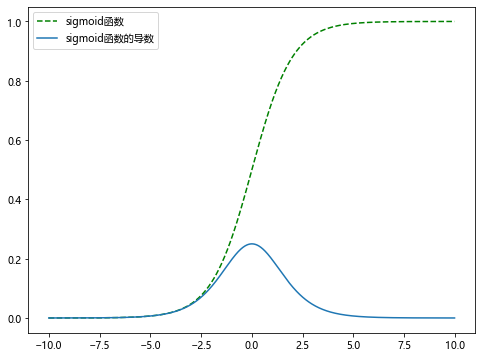

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# 设置matplotlib支持中文
plt.rcParams["font.family"] = 'Microsoft YaHei'

# 创建数据
x = np.arange(-10,10,0.025)
y = 1 / (1 + np.exp(-x))

# 绘制图像
plt.figure(figsize=(8,6))
plt.plot(x, y, c='g', linestyle='--', label="sigmoid函数")

plt.plot(x,np.exp(-x)/(1+np.exp(-x))**2, label="sigmoid函数的导数")
plt.legend(loc='best')
plt.show()